In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DragonBoatData/351Bing_Complete_Modified.csv')

In [3]:
X = df[['Date', 'Space Ft2', 'Bedroom', 'Bathroom',
       'Furnished', 'Laundry', 'Housing Type', 'Parking', 'Zipcode']]
y = df['Price']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()

In [8]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print(lm.intercept_)

463.369403838


In [10]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Date,0.001183
Space Ft2,0.054569
Bedroom,13.799021
Bathroom,26.205536
Furnished,114.308764
Laundry,18.236714
Housing Type,-32.569496
Parking,46.034246
Zipcode,-0.040756


In [11]:
predictions = lm.predict(X_test)

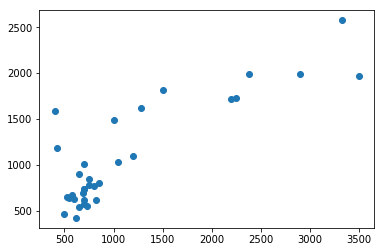

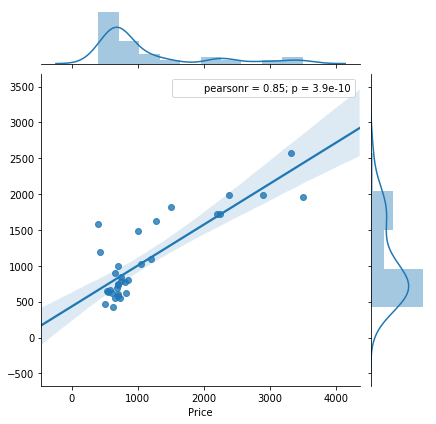

In [12]:
plt.scatter(y_test,predictions)
sns.jointplot(x=y_test, y=predictions, kind='reg')

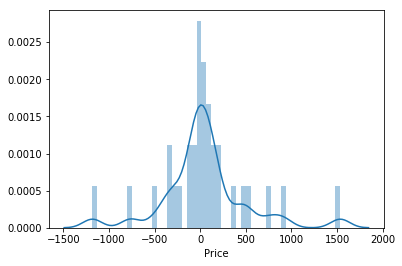

In [13]:
sns.distplot((y_test-predictions),bins=50);

In [14]:
import statsmodels.api as sm

/Users/yonghengli/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
X = sm.add_constant(X_test) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
predictions = lm.predict(X_test)
model = sm.OLS(y_test, predictions).fit() ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     271.4
Date:                Sat, 24 Feb 2018   Prob (F-statistic):           3.46e-17
Time:                        19:44:59   Log-Likelihood:                -248.70
No. Observations:                  33   AIC:                             499.4
Df Residuals:                      32   BIC:                             500.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0911      0.066     16.474      0.000       0.956       1.226
==============================================================================
Omnibus:                        7.004   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.144
Skew:                           0.188   Prob(JB):                      0.00627
Kurtosis:                       5.690   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from sklearn import metrics

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 299.441152236
MSE: 217970.588067
RMSE: 466.873203415
